### Some Examples of Clustering in `sklearn`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from sklearn.datasets import make_blobs, make_moons

In [3]:
X1, y1 = make_blobs(random_state = 25, n_features=3)
X2, y2 = make_moons(noise = 0.04)

In [4]:
from mpl_toolkits.mplot3d import Axes3D

In [5]:
X1

array([[ 3.24265451, -0.02642344,  0.91804116],
       [ 7.65981286,  2.28582039, -3.42286384],
       [ 4.28213232, -2.71651339,  1.3474662 ],
       [-7.22862651, -2.60661936, -7.92707106],
       [ 3.06428034, -1.63318585, -0.36509601],
       [ 3.91566861, -1.11381045,  1.80111886],
       [-5.98130085, -1.40971444, -7.62665088],
       [ 6.68570053,  2.8079753 , -5.90981474],
       [ 1.7900582 , -1.48612907,  1.69445905],
       [ 1.85019033, -0.30184844,  1.56457666],
       [ 3.8926122 , -0.59782625,  1.23666529],
       [ 6.03607752,  2.68327467, -3.83705769],
       [-6.94254035, -2.66100274, -7.55244664],
       [ 6.9095307 ,  1.93739023, -3.73446958],
       [ 9.56060644,  1.77369494, -2.87768126],
       [ 5.06485658, -1.4567142 ,  0.6779718 ],
       [ 2.48049037, -2.10627058,  1.28525331],
       [-6.40205341, -4.57704383, -7.33729418],
       [-7.65018748, -3.69283846, -7.81224802],
       [-7.06671012, -4.09123428, -9.65327793],
       [-6.41172966, -0.19053344, -7.426

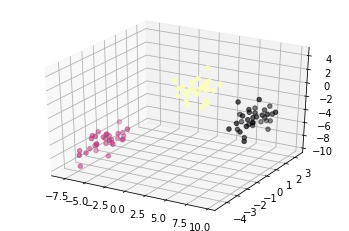

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c = y1, cmap = 'magma')

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sscaler = StandardScaler()
X1 = sscaler.fit_transform(X1)

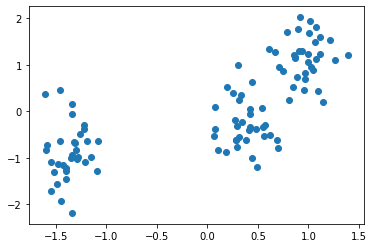

In [9]:
plt.scatter(X1[:, 0], X1[:, 1])

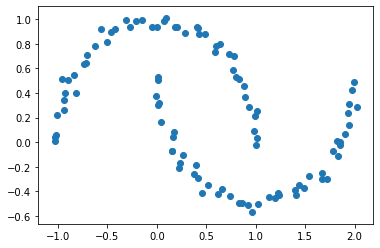

In [10]:
plt.scatter(X2[:, 0], X2[:, 1])

### KMeans

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters = 2)

In [13]:
kmeans.fit(X1, y1)

KMeans(n_clusters=2)

In [14]:
kmeans.labels_

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int32)

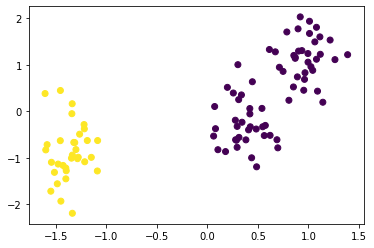

In [15]:
plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_)

In [16]:
new_point = np.array([[2.5, -2, 5]])

In [17]:
kmeans.predict(new_point)

array([0], dtype=int32)

In [18]:
kmeans.inertia_

116.18599947972743

In [19]:
kmean3 = KMeans(3)

In [20]:
kmean3.fit(X1)

KMeans(n_clusters=3)

In [21]:
kmean3.inertia_

36.782979515994214

In [22]:
k = []
for i in range(2, 8):
    kmean = KMeans(i)
    kmean.fit(X1)
    k.append(kmean.inertia_)

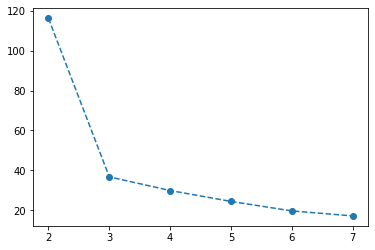

In [23]:
plt.plot(range(2, 8), k, '--o')

In [24]:
X1, y1 = make_blobs(random_state = 25)

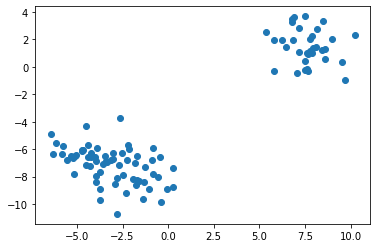

In [25]:
plt.scatter(X1[:, 0], X1[:, 1])

In [26]:
from sklearn.datasets import load_iris

In [27]:
data = load_iris()

In [28]:
import seaborn as sns

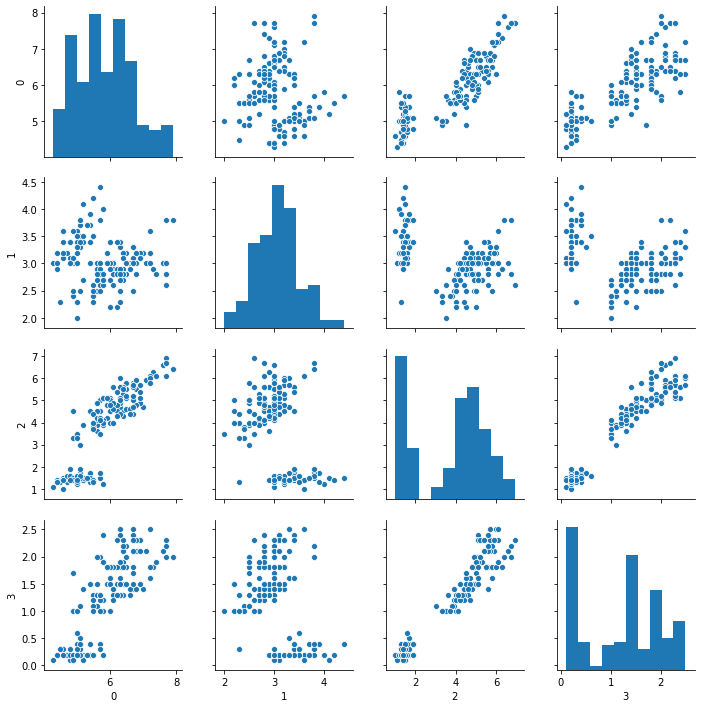

In [29]:
sns.pairplot(pd.DataFrame(data.data))

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
X = data.data
scores = []
for i in range(2, 9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    scores.append((kmeans.inertia_, silhouette_score(X, kmeans.labels_)))

In [32]:
scores

[(152.34795176035797, 0.681046169211746),
 (78.851441426146, 0.5528190123564091),
 (57.22847321428572, 0.4980505049972867),
 (46.44618205128204, 0.4887488870931048),
 (39.03998724608725, 0.3648340039670018),
 (34.299712121212146, 0.3566882476581684),
 (30.19447245564895, 0.34445888187177737)]

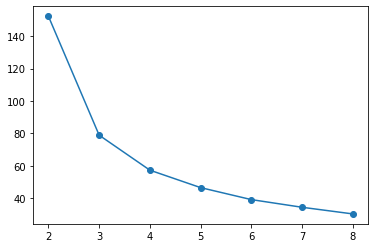

In [33]:
plt.plot(range(2, 9), [i[0] for i in scores], '-o')

In [34]:
#from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

In [35]:
# elbow = KElbowVisualizer(kmeans, k = (1, 10))

In [36]:
# elbow.fit(X1)

In [37]:
# kmeans = KMeans(5)
# sil = SilhouetteVisualizer(kmeans)

In [38]:
# sil.fit(X2)

In [39]:
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(X)
# inter_d = InterclusterDistance(kmeans)
# inter_d.fit(X);

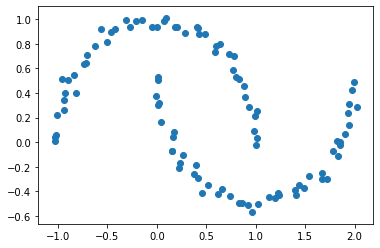

In [40]:
plt.scatter(X2[:, 0], X2[:, 1])

In [41]:
kmeans = KMeans(2)

In [42]:
kmeans.fit(X2)

KMeans(n_clusters=2)

In [43]:
labels = kmeans.labels_

In [44]:
plt.style.use('fivethirtyeight')

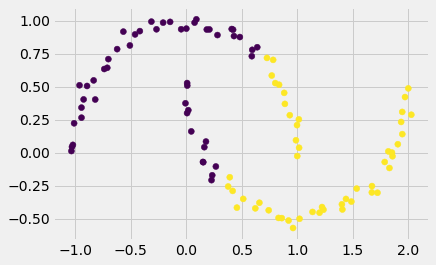

In [45]:
plt.scatter(X2[:, 0], X2[:, 1], c = labels)

### Other Options in sklearn

In [46]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

In [60]:
agglom = AgglomerativeClustering()
kmean = KMeans(n_clusters=2)
db = DBSCAN(min_samples=5)

In [61]:
X1, y1 = make_blobs(random_state = 25)

In [62]:
plt.style.use('ggplot')

Text(0.0, 1.0, 'DBSCAN')

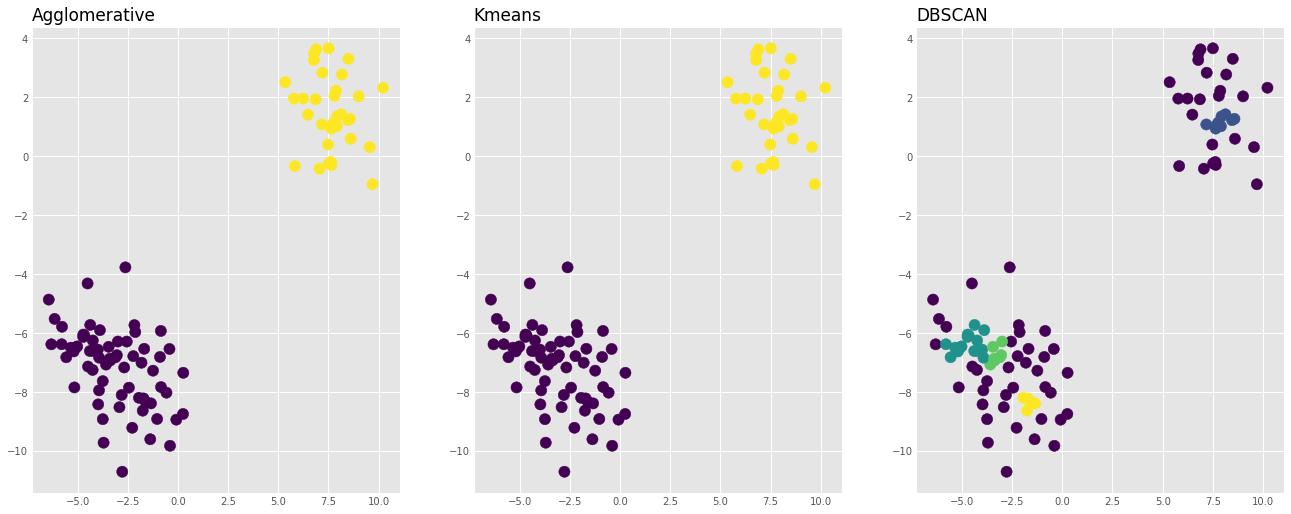

In [63]:
agglom.fit(X1)
kmean.fit(X1)
db.fit(X1)

a_labels = agglom.labels_
k_labels = kmean.labels_
db_labels = db.labels_

a_labels

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 8))
axs[0].scatter(X1[:, 0], X1[:, 1], c = a_labels, s = 125)
axs[0].set_title('Agglomerative', loc = 'left', fontsize = 17)

axs[1].scatter(X1[:, 0], X1[:, 1], c = k_labels, s = 125)
axs[1].set_title('Kmeans', loc = 'left', fontsize = 17)

axs[2].scatter(X1[:, 0], X1[:, 1], c = db_labels, s = 125)
axs[2].set_title('DBSCAN', loc = 'left', fontsize = 17)

In [64]:
from sklearn.cluster import SpectralClustering, OPTICS

In [65]:
spec = OPTICS(2)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [66]:
spec.fit(X2)

OPTICS(min_samples=2)

In [67]:
db_labels

array([-1, -1, -1,  0, -1, -1, -1, -1,  1,  0,  1,  3, -1, -1,  2, -1, -1,
       -1, -1, -1,  2, -1,  2, -1, -1, -1,  2, -1, -1, -1, -1,  0, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  3,
        1,  2,  1,  1, -1, -1, -1,  1, -1, -1, -1,  0, -1,  3, -1, -1, -1,
        3,  1, -1, -1,  0,  1, -1,  2, -1, -1, -1, -1, -1,  1, -1, -1,  0,
       -1,  0,  1, -1,  1, -1, -1, -1, -1,  0,  2,  0,  3, -1,  1])

Text(0.0, 1.0, 'Spectral')

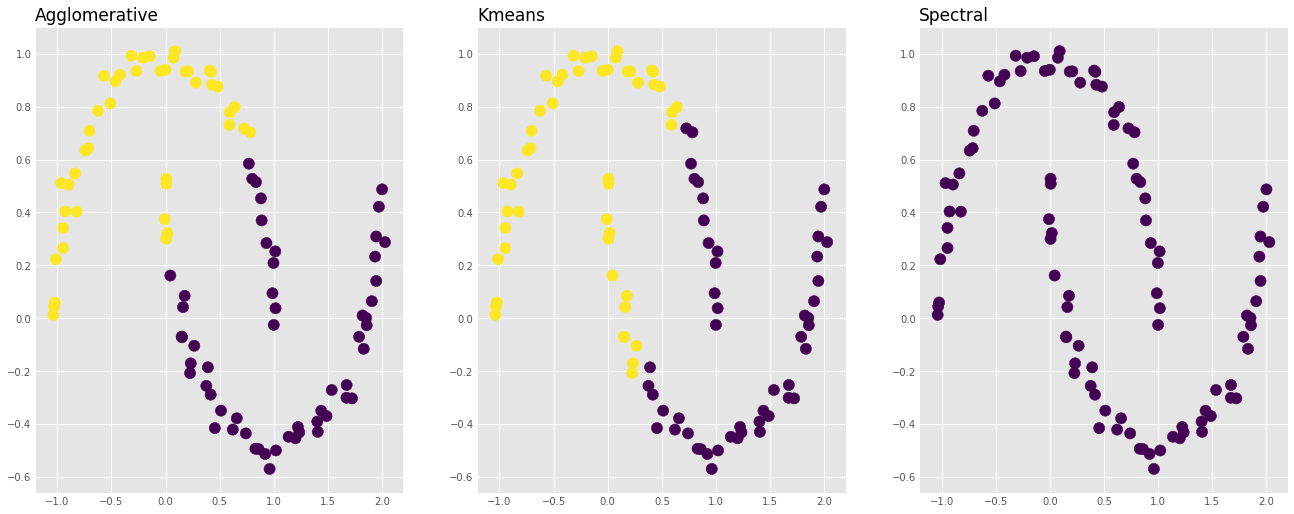

In [68]:
agglom.fit(X2)
kmean.fit(X2)
db.fit(X2)

a_labels = agglom.labels_
k_labels = kmean.labels_
db_labels = db.labels_
spec_labels = spec.labels_


fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 8))
axs[0].scatter(X2[:, 0], X2[:, 1], c = a_labels, s = 125)
axs[0].set_title('Agglomerative', loc = 'left', fontsize = 17)

axs[1].scatter(X2[:, 0], X2[:, 1], c = k_labels, s = 125)
axs[1].set_title('Kmeans', loc = 'left', fontsize = 17)

axs[2].scatter(X2[:, 0], X2[:, 1], c = db_labels, s = 125)
axs[2].set_title('Spectral', loc = 'left', fontsize = 17)

In [69]:
silhouette_score(X2, agglom.labels_)

0.46753450402865254

In [70]:
silhouette_score(X2, kmean.labels_)

0.48084207621905556

In [73]:
from scipy.cluster.hierarchy import dendrogram, ward

In [74]:
X3, y = make_blobs(n_samples = 13)
linkage_array = ward(X3)

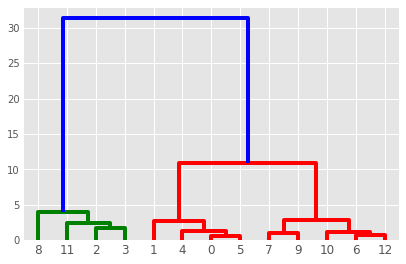

In [75]:
dendrogram(linkage_array);

In [ ]:
X3

In [ ]:
X3[2, :]

In [ ]:
X3[8, :]

In [ ]:
np.linalg.norm(X3[2, :]- X3[8, :])

In [ ]:
X3[8, :]

In [ ]:
from sklearn.metrics import sil

In [76]:
from sklearn.mixture import GaussianMixture

In [77]:
gmm = GaussianMixture(n_components=2)

In [78]:
gmm.fit(X3)

GaussianMixture(n_components=2)

In [79]:
cs = gmm.fit_predict(X2)

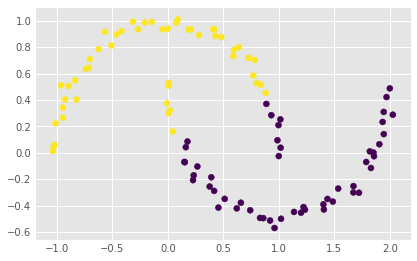

In [80]:
plt.scatter(X2[:, 0], X2[:, 1], c = cs)

In [81]:
import pandas as pd

In [84]:
textdf = pd.read_csv('tweets.csv', index_col = 0)

In [85]:
textdf.head()

,retweets,tweets,user
0,15122,"As of today, there are 14 weeks until the midt...",HillaryClinton
1,2152,Congrats to @IndivisibleTeam volunteers around...,HillaryClinton
2,401,RT @latinovictoryus: 🙌🏼 This is a humanitarian...,HillaryClinton
3,1538,"Give them all a follow, a RT, or an email sign...",HillaryClinton
4,1619,After Justice Kennedy announced his retirement...,HillaryClinton


In [86]:
#prepare the data
from sklearn.feature_extraction.text import CountVectorizer

In [118]:
sscaler = StandardScaler(with_mean = False)
X = sscaler.fit_transform(X)

In [90]:
cvect = CountVectorizer(stop_words='english', max_features=100)
X = cvect.fit_transform(textdf.tweets)

In [119]:
kmeans = KMeans(5)

In [120]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [121]:
labels = kmeans.labels_

In [122]:
textdf['labels'] = labels

In [123]:
textdf.head()

,retweets,tweets,user,labels
0,15122,"As of today, there are 14 weeks until the midt...",HillaryClinton,1
1,2152,Congrats to @IndivisibleTeam volunteers around...,HillaryClinton,1
2,401,RT @latinovictoryus: 🙌🏼 This is a humanitarian...,HillaryClinton,1
3,1538,"Give them all a follow, a RT, or an email sign...",HillaryClinton,1
4,1619,After Justice Kennedy announced his retirement...,HillaryClinton,1


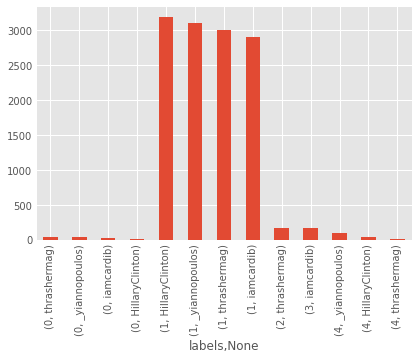

In [124]:
textdf.groupby('labels')['user'].apply(pd.value_counts).plot(kind = 'bar')

In [125]:
textdf.iloc[2, 1]

'RT @latinovictoryus: 🙌🏼 This is a humanitarian crisis being perpetrated by our own government. Thanks for raising awareness, @MarkRuffalo a…'

In [98]:
textdf.iloc[1, 1]

'Congrats to @IndivisibleTeam volunteers around the country for hosting and running 150+ events this weekend to reac… https://t.co/ZysitCZYgV'